# Animal Shelter Data Analytics


The dataset we work with is a sample of the data released by an animal shelter. The aim is to predict the binary outcome of an animal in the shelter, for this variable, the value “1” indicates that after intake, the animal outcome was negative, e.g., "death", while the value "0" indicates that the animal outcome was a positive one, e.g., was adopted or returned to the owner. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
from matplotlib.backends.backend_pdf import PdfPages
from datetime import datetime
import time
import calendar
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})

In [2]:
df = pd.read_csv('AnimalWelfareRisk-15722305.csv', keep_default_na=True, sep=',\s+', delimiter=',', skipinitialspace=True)
pd.options.display.max_rows = 1001
pd.options.display.max_columns =50

# (1). Prepare a data quality report for the CSV file.

### Check shape of CSV file

In [3]:
#Check how many rows and columns your CSV has.
df.shape

(1000, 22)

The dataset has 1000 entries with 22 features per entry.

### Print first and last 5 rows of CSV file

In [4]:
df.head(5)

,Animal ID,Name_Intake,DateTime_Intake,MonthYear_Intake,Found Location,Intake Type,Intake Condition,Animal Type_Intake,Sex upon Intake,Age upon Intake,Breed_Intake,Color_Intake,Name_Outcome,DateTime_Outcome,MonthYear_Outcome,Date of Birth,Animal Type_Outcome,Sex upon Outcome,Age upon Outcome,Breed_Outcome,Color_Outcome,binary_outcome
0,A674745,NaN,03/17/2014 06:30:00 PM,03/17/2014 06:30:00 PM,E Howard And Harris Ridge in Austin (TX),Wildlife,Injured,Other,Unknown,1 year,Skunk Mix,Black/White,NaN,03/17/2014 07:19:00 PM,03/17/2014 07:19:00 PM,03/17/2013,Other,Unknown,1 year,Skunk Mix,Black/White,1.0
1,A797639,NaN,06/15/2019 06:16:00 PM,06/15/2019 06:16:00 PM,3608 Verano Drive in Austin (TX),Stray,Normal,Cat,Intact Female,2 months,Domestic Shorthair,Black,NaN,06/21/2019 03:14:00 PM,06/21/2019 03:14:00 PM,03/31/2019,Cat,Intact Female,2 months,Domestic Shorthair,Black,0.0
2,A694741,Cleo,01/03/2015 01:55:00 PM,01/03/2015 01:55:00 PM,Austin (TX),Owner Surrender,Normal,Cat,Spayed Female,10 years,Domestic Medium Hair Mix,Black/White,Cleo,01/24/2015 01:26:00 PM,01/24/2015 01:26:00 PM,01/03/2005,Cat,Spayed Female,10 years,Domestic Medium Hair Mix,Black/White,0.0
3,A749932,*Harriet,05/21/2017 02:42:00 PM,05/21/2017 02:42:00 PM,1413 Webberville Rd in Austin (TX),Stray,Normal,Cat,Intact Female,3 weeks,Domestic Shorthair Mix,Brown Tabby,*Harriet,07/01/2017 04:54:00 PM,07/01/2017 04:54:00 PM,04/29/2017,Cat,Spayed Female,2 months,Domestic Shorthair Mix,Brown Tabby,0.0
4,A755577,Peanut,08/05/2017 11:14:00 AM,08/05/2017 11:14:00 AM,Austin (TX),Owner Surrender,Normal,Dog,Neutered Male,6 years,Rat Terrier Mix,Black/Gray,Peanut,08/10/2017 12:00:00 AM,08/10/2017 12:00:00 AM,08/05/2011,Dog,Neutered Male,6 years,Rat Terrier Mix,Black/Gray,0.0


In [5]:
df.tail(5)

,Animal ID,Name_Intake,DateTime_Intake,MonthYear_Intake,Found Location,Intake Type,Intake Condition,Animal Type_Intake,Sex upon Intake,Age upon Intake,Breed_Intake,Color_Intake,Name_Outcome,DateTime_Outcome,MonthYear_Outcome,Date of Birth,Animal Type_Outcome,Sex upon Outcome,Age upon Outcome,Breed_Outcome,Color_Outcome,binary_outcome
995,A796743,Georgia,06/04/2019 06:33:00 PM,06/04/2019 06:33:00 PM,10107 Rodriguez in Austin (TX),Stray,Normal,Cat,Intact Female,1 month,Domestic Shorthair,Brown Tabby/White,Georgia,06/09/2019 07:14:00 PM,06/09/2019 07:14:00 PM,04/19/2019,Cat,Intact Female,1 month,Domestic Shorthair,Brown Tabby/White,0.0
996,A776463,NaN,07/14/2018 10:57:00 AM,07/14/2018 10:57:00 AM,9704 Chukar Circle in Austin (TX),Stray,Normal,Cat,Unknown,1 year,Domestic Shorthair Mix,Brown Tabby/White,NaN,07/17/2018 05:24:00 PM,07/17/2018 05:24:00 PM,07/14/2017,Cat,Unknown,1 year,Domestic Shorthair Mix,Brown Tabby/White,0.0
997,A683361,Chewy,07/09/2014 03:41:00 PM,07/09/2014 03:41:00 PM,8714 Fm812 in Austin (TX),Stray,Normal,Dog,Intact Male,1 month,Cairn Terrier/Chihuahua Shorthair,Brown Brindle,Chewy,08/20/2014 04:58:00 PM,08/20/2014 04:58:00 PM,05/25/2014,Dog,Neutered Male,2 months,Cairn Terrier/Chihuahua Shorthair,Brown Brindle,0.0
998,A804636,Thumper,09/16/2019 04:29:00 PM,09/16/2019 04:29:00 PM,10501 La Costa Drive in Austin (TX),Stray,Normal,Cat,Intact Male,1 month,Domestic Shorthair,Brown Tabby,Thumper,10/26/2019 04:07:00 PM,10/26/2019 04:07:00 PM,07/22/2019,Cat,Neutered Male,3 months,Domestic Shorthair,Brown Tabby,0.0
999,A728810,NaN,06/08/2016 05:30:00 PM,06/08/2016 05:30:00 PM,8210 Chalk Knoll Drive in Austin (TX),Stray,Nursing,Cat,Intact Male,2 weeks,Domestic Shorthair Mix,Blue,NaN,06/10/2016 03:11:00 PM,06/10/2016 03:11:00 PM,05/24/2016,Cat,Intact Male,2 weeks,Domestic Shorthair Mix,Blue,0.0


### Convert features to appropriate datatypes

In [6]:
df.dtypes

Animal ID               object
Name_Intake             object
DateTime_Intake         object
MonthYear_Intake        object
Found Location          object
Intake Type             object
Intake Condition        object
Animal Type_Intake      object
Sex upon Intake         object
Age upon Intake         object
Breed_Intake            object
Color_Intake            object
Name_Outcome            object
DateTime_Outcome        object
MonthYear_Outcome       object
Date of Birth           object
Animal Type_Outcome     object
Sex upon Outcome        object
Age upon Outcome        object
Breed_Outcome           object
Color_Outcome           object
binary_outcome         float64
dtype: object

Based on examining the data in a spreadsheet program, 6 of the features are continuous and the rest categorical. 3 of these continuous values are datetime values which will be considered differently than the rest

- *Binary outcome* will be converted to **categorical** because it contains only 2 possible values, 0 or 1.
- *Age upon Intake* column will be converted to **continous** and the values will represnt the value in days to make the data uniform and comparable
- *Age upon Outcome* column will be converted to **continous** and the values will reprsent the value in days to make the data uniform and comparable
- *MonthYear_Intake, MonthYear_Outcome, DateTime_Intake, DateTime_Intake, Date of birth* are all converted to datetime data types
- All other object values will be converted to **categorical** values

In [7]:
#Convert selected columns to type 'category'
df.DateTime_Intake= pd.to_datetime(df.DateTime_Intake)
df.DateTime_Outcome= pd.to_datetime(df.DateTime_Outcome)
df["Date of Birth"]=df["Date of Birth"].astype('datetime64')
df["MonthYear_Intake"]=df["MonthYear_Intake"].astype('datetime64')
df["MonthYear_Outcome"]=df["MonthYear_Outcome"].astype('datetime64')

object_columns = df.select_dtypes(['object']).columns
for column in object_columns:
    df[column] = df[column].astype('category')

#converting binary_outcome from continuous to ctegorical data
df1 = df['binary_outcome']
df1 = df1.replace(0, 'positive')
df1 = df1.replace(1, 'negative')

df['binary_outcome'] = df1
df['binary_outcome'] = df['binary_outcome'].astype('category')


In [8]:
#convert 'Age upon Outcome' to uniform values (in days)
dateOut=df['DateTime_Outcome']
dateIn=df['DateTime_Intake']
age_outcome=df['DateTime_Outcome']-df["Date of Birth"]

df['Age Outcome']=pd.Series(age_outcome, dtype='datetime64[ns]')
df['Age Outcome']= df['Age Outcome'].dt.days
df['Age Outcome'].astype('timedelta64[D]')
df=df.drop(['Age upon Outcome'],1)

In [9]:
#convert Age upon Intake' to uniform values (in days)
age_intake=df['DateTime_Intake']-df["Date of Birth"]

df['Age Intake']=pd.Series(age_intake, dtype='datetime64[ns]')
df['Age Intake']= df['Age Intake'].dt.days
df['Age Intake'].astype('timedelta64[D]')
df=df.drop(['Age upon Intake'],1)

In [10]:
df.dtypes

Animal ID                    category
Name_Intake                  category
DateTime_Intake        datetime64[ns]
MonthYear_Intake       datetime64[ns]
Found Location               category
Intake Type                  category
Intake Condition             category
Animal Type_Intake           category
Sex upon Intake              category
Breed_Intake                 category
Color_Intake                 category
Name_Outcome                 category
DateTime_Outcome       datetime64[ns]
MonthYear_Outcome      datetime64[ns]
Date of Birth          datetime64[ns]
Animal Type_Outcome          category
Sex upon Outcome             category
Breed_Outcome                category
Color_Outcome                category
binary_outcome               category
Age Outcome                     int64
Age Intake                      int64
dtype: object

### Check for duplicate row/columns

In [11]:
#Print the number of duplicates, without the original rows that were duplicated
print('Number of duplicate (excluding first) rows in the table is: ', df.duplicated().sum())

# Check for duplicate rows. 
# Use "keep=False" to mark all duplicates as true, including the original rows that were duplicated.
print('Number of duplicate rows (including first) in the table is:', df[df.duplicated(keep=False)].shape[0])

Number of duplicate (excluding first) rows in the table is:  0
Number of duplicate rows (including first) in the table is: 0


In [12]:
# Check for duplicate columns
#First transpose the df so columns become rows, then apply the same check as above
dfT = df.T
print("Number of duplicate (excluding first) columns in the table is: ", dfT.duplicated().sum())
print("Number of duplicate (including first) columns in the table is: ",  dfT[dfT.duplicated(keep=False)].shape[0])

Number of duplicate (excluding first) columns in the table is:  6
Number of duplicate (including first) columns in the table is:  12


In [13]:
dfT[dfT.duplicated(keep=False)]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999
Name_Intake,NaN,NaN,Cleo,*Harriet,Peanut,NaN,NaN,Tobi,*Luke,NaN,NaN,NaN,NaN,*Rose,Thelma,Metta,Fancy,*Amber,Fiona,Billy,*Mindy,NaN,Halo,NaN,*Beatrice,...,*Amy,*Mocha,*Tabitha,*Sly,*Natty,*Jackie,Larry,Tornado,Winston,Kronic,Whiskey,Skye,NaN,NaN,NaN,NaN,NaN,Reno,Duke,Dae,Georgia,NaN,Chewy,Thumper,NaN
DateTime_Intake,2014-03-17 18:30:00,2019-06-15 18:16:00,2015-01-03 13:55:00,2017-05-21 14:42:00,2017-08-05 11:14:00,2018-09-07 15:31:00,2018-08-09 18:16:00,2018-07-03 15:57:00,2014-08-08 11:15:00,2019-03-04 10:47:00,2015-05-06 11:05:00,2019-03-22 12:54:00,2015-11-21 15:48:00,2019-09-14 11:13:00,2017-09-26 11:23:00,2014-09-17 13:17:00,2016-03-06 14:59:00,2015-05-16 15:32:00,2018-04-01 11:28:00,2018-07-31 12:10:00,2015-08-21 12:02:00,2014-05-12 14:48:00,2017-06-12 12:04:00,2013-10-29 18:37:00,2019-08-26 13:12:00,...,2014-10-06 11:26:00,2018-10-27 17:32:00,2016-03-27 13:23:00,2014-03-12 16:27:00,2017-02-16 15:59:00,2016-11-23 16:31:00,2019-09-25 17:03:00,2013-10-09 12:11:00,2015-12-08 12:37:00,2017-06-02 09:20:00,2016-12-29 12:14:00,2020-01-18 11:57:00,2017-03-07 07:52:00,2014-07-04 15:52:00,2017-05-12 16:54:00,2015-06-09 13:40:00,2019-06-18 22:07:00,2019-06-01 19:44:00,2013-10-16 12:32:00,2019-12-29 11:20:00,2019-06-04 18:33:00,2018-07-14 10:57:00,2014-07-09 15:41:00,2019-09-16 16:29:00,2016-06-08 17:30:00
MonthYear_Intake,2014-03-17 18:30:00,2019-06-15 18:16:00,2015-01-03 13:55:00,2017-05-21 14:42:00,2017-08-05 11:14:00,2018-09-07 15:31:00,2018-08-09 18:16:00,2018-07-03 15:57:00,2014-08-08 11:15:00,2019-03-04 10:47:00,2015-05-06 11:05:00,2019-03-22 12:54:00,2015-11-21 15:48:00,2019-09-14 11:13:00,2017-09-26 11:23:00,2014-09-17 13:17:00,2016-03-06 14:59:00,2015-05-16 15:32:00,2018-04-01 11:28:00,2018-07-31 12:10:00,2015-08-21 12:02:00,2014-05-12 14:48:00,2017-06-12 12:04:00,2013-10-29 18:37:00,2019-08-26 13:12:00,...,2014-10-06 11:26:00,2018-10-27 17:32:00,2016-03-27 13:23:00,2014-03-12 16:27:00,2017-02-16 15:59:00,2016-11-23 16:31:00,2019-09-25 17:03:00,2013-10-09 12:11:00,2015-12-08 12:37:00,2017-06-02 09:20:00,2016-12-29 12:14:00,2020-01-18 11:57:00,2017-03-07 07:52:00,2014-07-04 15:52:00,2017-05-12 16:54:00,2015-06-09 13:40:00,2019-06-18 22:07:00,2019-06-01 19:44:00,2013-10-16 12:32:00,2019-12-29 11:20:00,2019-06-04 18:33:00,2018-07-14 10:57:00,2014-07-09 15:41:00,2019-09-16 16:29:00,2016-06-08 17:30:00
Animal Type_Intake,Other,Cat,Cat,Cat,Dog,Cat,Cat,Dog,Cat,Dog,Cat,Dog,Cat,Cat,Dog,Other,Dog,Cat,Dog,Dog,Dog,Cat,Dog,Dog,Cat,...,Cat,Dog,Cat,Dog,Dog,Dog,Dog,Cat,Dog,Dog,Dog,Dog,Other,Cat,Cat,Cat,Other,Dog,Dog,Dog,Cat,Cat,Dog,Cat,Cat
Breed_Intake,Skunk Mix,Domestic Shorthair,Domestic Medium Hair Mix,Domestic Shorthair Mix,Rat Terrier Mix,Domestic Shorthair Mix,Domestic Shorthair Mix,Yorkshire Terrier Mix,Domestic Shorthair Mix,Great Pyrenees,Domestic Shorthair Mix,Chihuahua Shorthair Mix,Domestic Shorthair Mix,Domestic Shorthair Mix,Yorkshire Terrier Mix,Ferret,Labrador Retriever Mix,Domestic Shorthair Mix,Staffordshire Mix,Great Pyrenees Mix,Labrador Retriever Mix,Domestic Shorthair Mix,German Shepherd Mix,Australian Cattle Dog Mix,Domestic Shorthair Mix,...,Domestic Shorthair Mix,Staffordshire Mix,Domestic Shorthair Mix,Dogo Argentino Mix,Chihuahua Shorthair Mix,Labrador Retriever Mix,Rottweiler,Domestic Shorthair Mix,Mastiff/Chinese Sharpei,Pit Bull Mix,Siberian Husky Mix,Carolina Dog,Opossum Mix,Domestic Shorthair Mix,Domestic Shorthair Mix,Domestic Shorthair Mix,Bat,Labrador Retriever/Great Pyrenees,Pit Bull Mix,Siberian Husky,Domestic Shorthair,Domestic Shorthair Mix,Cairn Terrier/Chihuahua Shorthair,Domestic Shorthair,Domestic Shorthair Mix
Color_Intake,Black/White,Black,Black/White,Brown Tabby,Black/Gray,Brown Tabby,Black/White,Brown/Black,Orange Tabby,White,Orange Tabby,Black,Brown Tabby/White,Orange Tabby/White,White,Brown,Black/White,Tortie,Blue/White,Whit

In [14]:
# Drop duplicate rows and columns
df = df.drop(['Name_Outcome' ,'MonthYear_Intake','Animal Type_Outcome', 'MonthYear_Outcome' , 'Breed_Outcome','Color_Outcome'], 1)

#### Result - Duplicate columns exist

- Rows - There are no duplicate rows. We will also check the descriptive stats to make sure we did not miss any duplicated rows.
- Columns - There are 6 duplicate columns :'Name_Outcome' ,'MonthYear_Intake','Animal Type_Outcome', 'MonthYear_Outcome' , 'Breed_Outcome','Color_Outcome' which i dropped

In [15]:
dfT = df.T
print("Number of duplicate (excluding first) columns in the table is: ", dfT.duplicated().sum())
print("Number of duplicate (including first) columns in the table is: ",  dfT[dfT.duplicated(keep=False)].shape[0])

Number of duplicate (excluding first) columns in the table is:  0
Number of duplicate (including first) columns in the table is:  0


#### The duplicate checks seems to be working as expected.

Duplicate columns are now be dropped from the original data frame.

In [16]:
df

,Animal ID,Name_Intake,DateTime_Intake,Found Location,Intake Type,Intake Condition,Animal Type_Intake,Sex upon Intake,Breed_Intake,Color_Intake,DateTime_Outcome,Date of Birth,Sex upon Outcome,binary_outcome,Age Outcome,Age Intake
0,A674745,NaN,2014-03-17 18:30:00,E Howard And Harris Ridge in Austin (TX),Wildlife,Injured,Other,Unknown,Skunk Mix,Black/White,2014-03-17 19:19:00,2013-03-17,Unknown,negative,365,365
1,A797639,NaN,2019-06-15 18:16:00,3608 Verano Drive in Austin (TX),Stray,Normal,Cat,Intact Female,Domestic Shorthair,Black,2019-06-21 15:14:00,2019-03-31,Intact Female,positive,82,76
2,A694741,Cleo,2015-01-03 13:55:00,Austin (TX),Owner Surrender,Normal,Cat,Spayed Female,Domestic Medium Hair Mix,Black/White,2015-01-24 13:26:00,2005-01-03,Spayed Female,positive,3673,3652
3,A749932,*Harriet,2017-05-21 14:42:00,1413 Webberville Rd in Austin (TX),Stray,Normal,Cat,Intact Female,Domestic Shorthair Mix,Brown Tabby,2017-07-01 16:54:00,2017-04-29,Spayed Female,positive,63,22
4,A755577,Peanut,2017-08-05 11:14:00,Austin (TX),Owner Surrender,Normal,Dog,Neutered Male,Rat Terrier Mix,Black/Gray,2017-08-10 00:00:00,2011-08-05,Neutered Male,positive,2197,2192
5,A779974,NaN,2018-09-07 15:31:00,8502 Dryfield Drive in Austin (TX),Stray,Normal,Cat,Spayed Female,Domestic Shorthair Mix,Brown Tabby,2018-09-12 14:55:00,2016-09-07,Spayed Female,positive,735,730
6,A778198,NaN,2018-08-09 18:16:00,4504 Sojourner Street in Austin (TX),Stray,Normal,Cat,Unknown,Domestic Shorthair Mix,Black/White,2018-08-22 14:14:00,2017-08-09,Unknown,positive,378,365
7,A775714,Tobi,2018-07-03 15:57:00,13041 Jelly Palm Trail in Travis (TX),Stray,Normal,Dog,Intact Male,Yorkshire Terrier Mix,Brown/Black,2018-07-04 12:16:00,2017-07-03,Intact Male,positive,366,365
8,A685492,*Luke,2014-08-08 11:15:00,3522 E Martin Luther King Jr Blvd in Austin (TX),Stray,Normal,Cat,Intact Male,Domestic Shorthair Mix,Orange Tabby,2014-08-17 15:09:00,2014-06-05,Neutered Male,positive,73,64
9,A790057,NaN,2019-03-04 10:47:00,2201 Montopolis Drive in Austin (TX),Stray,Normal,Dog,Intact Male,Great Pyrenees,White,2019-03-04 17:04:00,2019-01-20,Intact Male,positive,43,43


### Check for constant columns

In [17]:
# Print table with categorical statistics
df.select_dtypes(['category']).describe().T

,count,unique,top,freq
Animal ID,1000,1000,A812886,1
Name_Intake,638,550,Luna,7
Found Location,1000,784,Austin (TX),157
Intake Type,1000,5,Stray,736
Intake Condition,1000,7,Normal,863
Animal Type_Intake,1000,4,Dog,509
Sex upon Intake,1000,5,Intact Male,351
Breed_Intake,1000,211,Domestic Shorthair Mix,299
Color_Intake,1000,104,Black,102
Sex upon Outcome,1000,5,Neutered Male,331


**Categorical Data** - Reviewing the categorical data below we can see all unique values > 1
- *Animal ID* has all unique values (1000)
- *Found location* has 784 unique values
- *Intake Type* has 5 unique values
- *Intake Condition* has 7 unique values
- *Sex Upon Intake* has 5 unique values
- *Breed Intake* has 211 unique values
- *Color_Intake* has 104 unique values
- *Name_Outcome* has 638 unique values
- *Animal Type_Outcome* has 4 unique values
- *Sex Upon Outcome* has 5 unique values


In [18]:
# Print table with continuous statistics
df.select_dtypes(include=['int64']).describe().T

,count,mean,std,min,25%,50%,75%,max
Age Outcome,1000.0,744.539,1052.929306,0.0,85.0,366.0,787.75,5480.0
Age Intake,1000.0,729.136,1051.930651,-2.0,61.0,365.0,731.00,5479.0


**Continuous Data** - Reviewing the continuous data below we can see all have a non zero standard deviation.  
- This implies that a particular feature does not contain a single constant value in all of the rows. Thus in this case, none of the continuous features are constant.
- Result - No constant columns

### Check for Null Values

In [19]:
df.isnull().sum()

Animal ID               0
Name_Intake           362
DateTime_Intake         0
Found Location          0
Intake Type             0
Intake Condition        0
Animal Type_Intake      0
Sex upon Intake         0
Breed_Intake            0
Color_Intake            0
DateTime_Outcome        0
Date of Birth           0
Sex upon Outcome        0
binary_outcome          0
Age Outcome             0
Age Intake              0
dtype: int64

- Result - Null values in  Name_Intake. For the other columns we will check carefully if these values are not coded differently in this dataset. It could be that data is missing but it was not coded as Null or NaN in the original dataset.

In [20]:
df.to_csv('new_df.csv', index = False)

## Descriptive Statistics: Continuous Features
Of the continuous features, we already know:
-  The type of data for each

<br>
We now supplement this information with the following

-  The range into which each feature can fall
-  A numerical representation of how these values are distributed across the upper tiers of that range 
-  Feature cardinality

### - Prepare a table with descriptive statistics for all the continuous features.<br> - Save to csv for data quality report

In [21]:
continuous_columns = df.select_dtypes(['int64','float']).columns
continuousFeatueDesc = df[continuous_columns].describe().T
continuousFeatueDesc.to_csv("continuousFeatureDescription.csv")
continuousFeatueDesc

,count,mean,std,min,25%,50%,75%,max
Age Outcome,1000.0,744.539,1052.929306,0.0,85.0,366.0,787.75,5480.0
Age Intake,1000.0,729.136,1051.930651,-2.0,61.0,365.0,731.00,5479.0


In [22]:
# For each continuous feature, we display the range of values it takes.
# We also display the number of instances each of its values has.
continuous_features = df.select_dtypes(['int64','float']).columns
for feature in continuous_features:
    print(feature)
    print("----------\n")
    print("Range {} is: ".format(feature), (df[feature].max() - df[feature].min()))
    print("----------")
    print('{0:.5}  {1}'.format("Value", "Number of Instances"))
    print(df[feature].value_counts().nlargest(15), "\n\n\n")

Age Outcome
----------

Range Age Outcome is:  5480
----------
Value  Number of Instances
365     22
366     22
15      20
22      16
370     16
735     11
367     10
81      10
730      9
1096     9
66       9
368      9
731      9
734      9
369      8
Name: Age Outcome, dtype: int64 



Age Intake
----------

Range Age Intake is:  5481
----------
Value  Number of Instances
365     121
730      65
731      36
1096     30
22       28
61       28
15       24
1826     23
366      19
31       19
122      14
1461     14
30       12
92       11
3652     11
Name: Age Intake, dtype: int64 





In [23]:
# Display the cardinality of each continuous feature
features_cardinality = list(df[continuous_features].columns.values)

print('{0:35}  {1}'.format("Feature", "Cardinality"))
print('{0:35}  {1}'.format("-------", "--------------- \n"))

for c in features_cardinality:
    print('{0:35}  {1}'.format(c, str(len(df[c].unique()))))

Feature                              Cardinality
-------                              --------------- 

Age Outcome                          468
Age Intake                           286


**Running Assessment:**
<br><br>

-  Examining the Descriptive Statistics tbale for continuous data I noticed that the minimum value for the age intake is a negative value. 
<br>
<br>
This means that the date intake was registered to be after the date outcome
We shall retain this original representation of the data for further comparison and documentation.
<br>
<br>
-  We shall take note of this data quality issue and address it in the Data Quality Plan.
-  We shall continue to visually represent the data as it stands.
-  We expect some of the results to be skewed because of the negative values


### Check logical integrity of data 
A number of additional checks will be performed to see if the data makes sense. Depending on the amount of data affected we may decide to drop those rows or replace the values upon consultation with a domain expert.

 - Test 1 Check that date columns are valid. 

In [24]:
start_date=dateOut
end_date= dateIn
test_1 = (end_date < start_date)
test_1results=df.loc[test_1== False]
test_1results

,Animal ID,Name_Intake,DateTime_Intake,Found Location,Intake Type,Intake Condition,Animal Type_Intake,Sex upon Intake,Breed_Intake,Color_Intake,DateTime_Outcome,Date of Birth,Sex upon Outcome,binary_outcome,Age Outcome,Age Intake
394,A681856,Gordo,2014-06-26 11:25:00,5300 Overbrook in Austin (TX),Owner Surrender,Sick,Dog,Neutered Male,Chihuahua Shorthair Mix,Black/White,2014-06-26 08:58:00,2011-12-21,Neutered Male,positive,918,918
426,A687689,Buddha,2015-12-16 11:46:00,Austin (TX),Owner Surrender,Normal,Dog,Neutered Male,American Bulldog Mix,White/Brown,2015-12-06 15:05:00,2014-07-08,Neutered Male,positive,516,526
457,A732061,*Otto,2017-11-08 17:21:00,Austin (TX),Stray,Injured,Cat,Neutered Male,Domestic Medium Hair Mix,Brown Tabby/White,2016-08-07 09:00:00,2014-08-01,Neutered Male,positive,737,1195
470,A793240,Louie,2019-11-30 11:06:00,Austin (TX),Owner Surrender,Normal,Dog,Neutered Male,Boxer Mix,Tan/White,2019-11-29 19:18:00,2017-04-22,Neutered Male,positive,951,952
478,A743708,NaN,2017-02-15 10:44:00,1200 Freedom Hill in Manor (TX),Stray,Normal,Other,Intact Male,Rat Mix,Gray/White,2017-02-15 09:14:00,2016-02-15,Intact Male,positive,366,366
487,A776965,Lucy,2018-11-23 15:54:00,Martin Luther King Boulevard And 24Th Street i...,Stray,Normal,Dog,Spayed Female,Plott Hound Mix,Brown Brindle,2018-07-22 11:58:00,2014-07-22,Spayed Female,positive,1461,1585
665,A728962,NaN,2016-06-11 15:50:00,Anderson Mill & 183 in Austin (TX),Stray,Sick,Cat,Intact Female,Domestic Medium Hair Mix,Tortie,2016-06-11 00:00:00,2016-05-27,Intact Female,positive,15,15
698,A732679,*Fiona,2017-08-30 16:00:00,Leander (TX),Owner Surrender,Normal,Dog,Spayed Female,American Pit Bull Terrier Mix,Yellow/White,2016-10-31 12:30:00,2014-08-11,Spayed Female,positive,812,1115
846,A771941,Luna,2019-12-30 17:27:00,Metric And Braker in Austin (TX),Stray,Normal,Dog,Intact Female,German Shepherd Mix,White,2019-11-16 15:00:00,2017-11-12,Intact Female,positive,734,778
918,A661097,Remi,2017-06-02 17:06:00,Austin (TX),Public Assist,Normal,Cat,Neutered Male,Domestic Shorthair Mix,Orange Tabby,2013-10-04 09:13:00,2012-08-15,Neutered Male,positive,415,1752


 - Test 2: Check that all age columns are valid. 

In [25]:
age = df['Age Intake']
test_2=(age < 0)
test_2results=df.loc[test_2== True]
test_2results


,Animal ID,Name_Intake,DateTime_Intake,Found Location,Intake Type,Intake Condition,Animal Type_Intake,Sex upon Intake,Breed_Intake,Color_Intake,DateTime_Outcome,Date of Birth,Sex upon Outcome,binary_outcome,Age Outcome,Age Intake
559,A757588,NaN,2017-09-02 18:19:00,5208 Diwa Circle in Del Valle (TX),Stray,Normal,Cat,Intact Male,Domestic Shorthair Mix,Brown Tabby/White,2017-11-02 18:11:00,2017-09-04,Neutered Male,positive,59,-2


### - Prepare a table with descriptive statistics for all the categorical features.

In [26]:
#Remove Animal ID as all unique values
df_noID= df.loc[:, df.columns != 'Animal ID']
categorical_columns = df_noID.select_dtypes(['category']).columns
df[categorical_columns].describe().T

,count,unique,top,freq
Name_Intake,638,550,Luna,7
Found Location,1000,784,Austin (TX),157
Intake Type,1000,5,Stray,736
Intake Condition,1000,7,Normal,863
Animal Type_Intake,1000,4,Dog,509
Sex upon Intake,1000,5,Intact Male,351
Breed_Intake,1000,211,Domestic Shorthair Mix,299
Color_Intake,1000,104,Black,102
Sex upon Outcome,1000,5,Neutered Male,331
binary_outcome,1000,2,positive,903


### - Save descriptive statistics for all the categorical features to csv for data quality report

In [27]:
categoricalFeatueDesc = df[categorical_columns].describe().T
categoricalFeatueDesc.to_csv("categoricalFeatureDescription.csv")

### - Plot histograms individual sheet for all the continuous features.

Few values does not need summary sheet

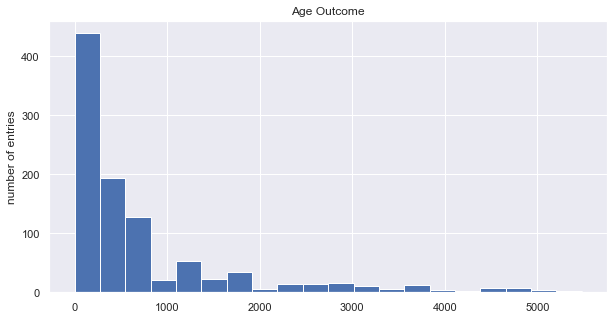

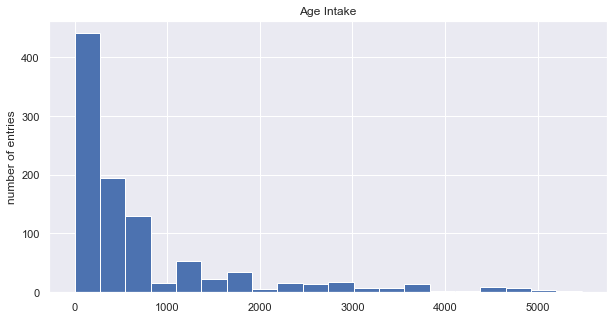

In [28]:
with PdfPages('continuous_histograms_1-1.pdf') as pp:
    for col in continuous_columns:
        f = df[col].plot(kind='hist', figsize=(10,5), bins=20)
        plt.title(col)
        plt.ylabel('number of entries')
        pp.savefig(f.get_figure())
        plt.show()    

### - Plot box plots individual sheet for all the continuous features.

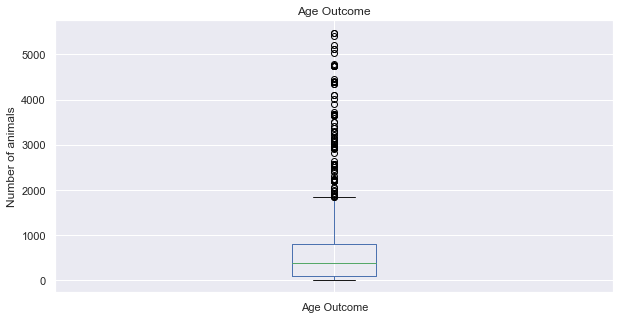

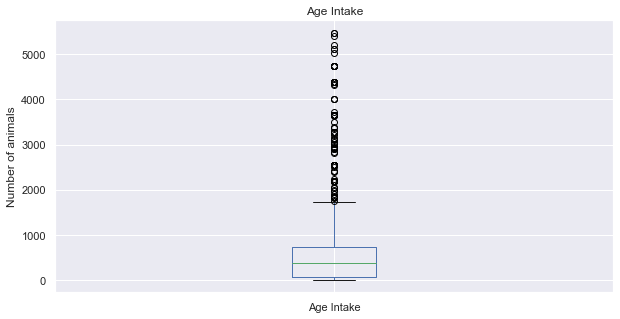

In [29]:
with PdfPages('continuous_boxplots_1-1.pdf') as pp:
    for col in continuous_columns:
        f = df[col].plot(kind='box', figsize=(10,5))
        plt.title(col)
        plt.ylabel('Number of animals')
        pp.savefig(f.get_figure())
        plt.show()   
    

### - Plot bar plots individual sheet for all the categorical features.

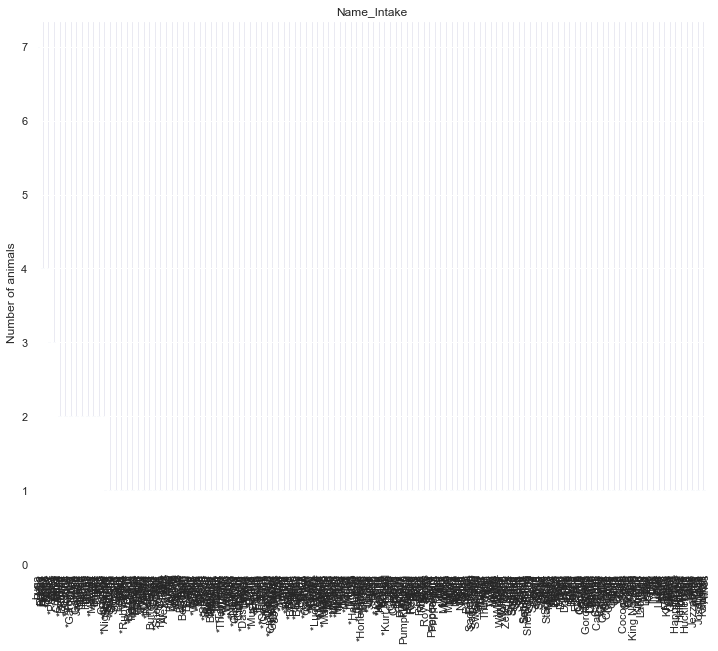

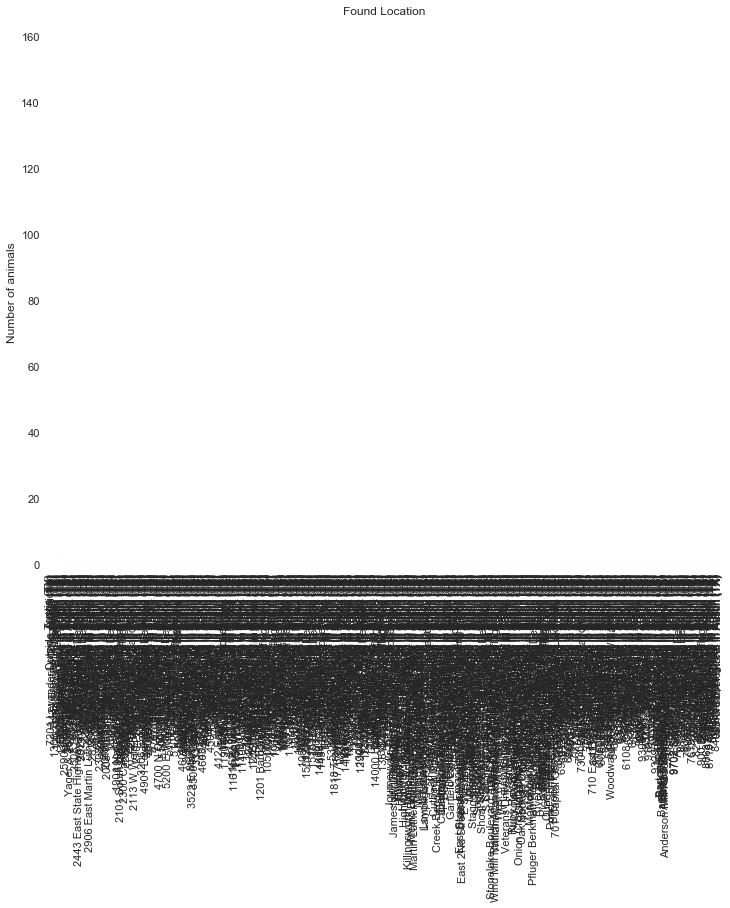

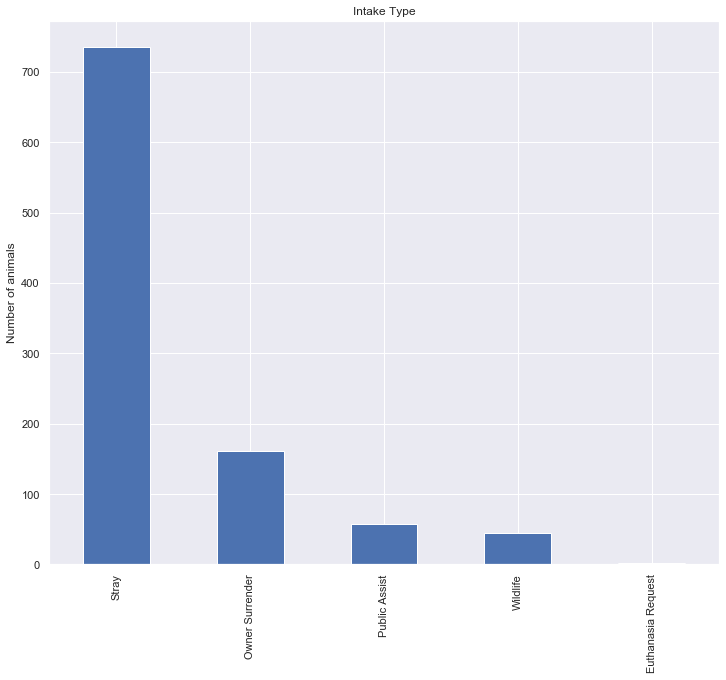

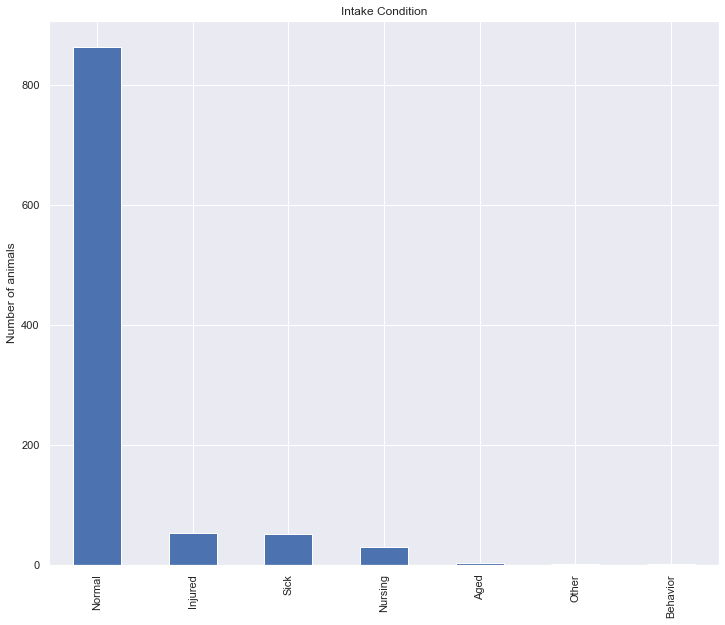

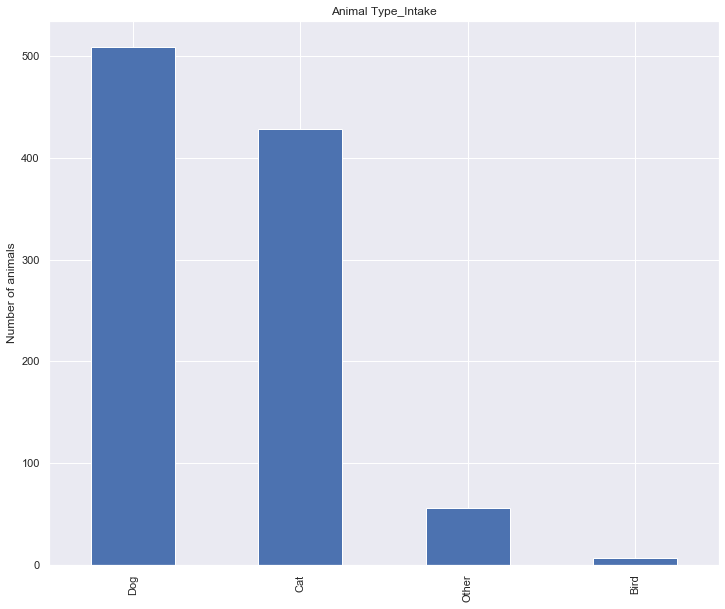

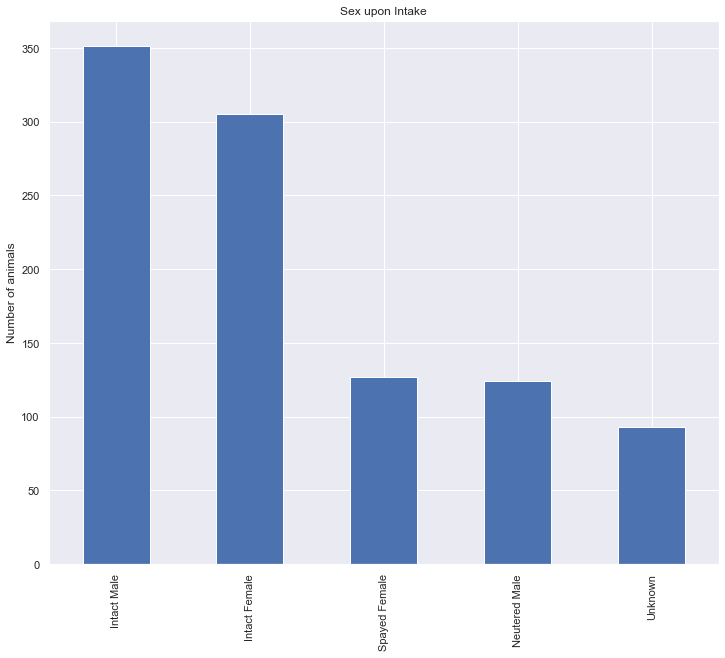

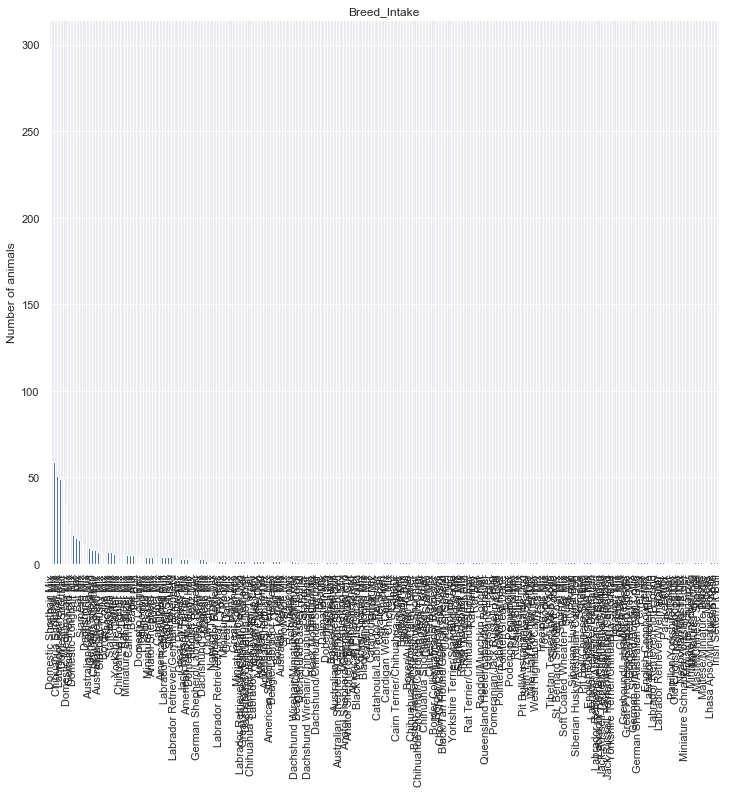

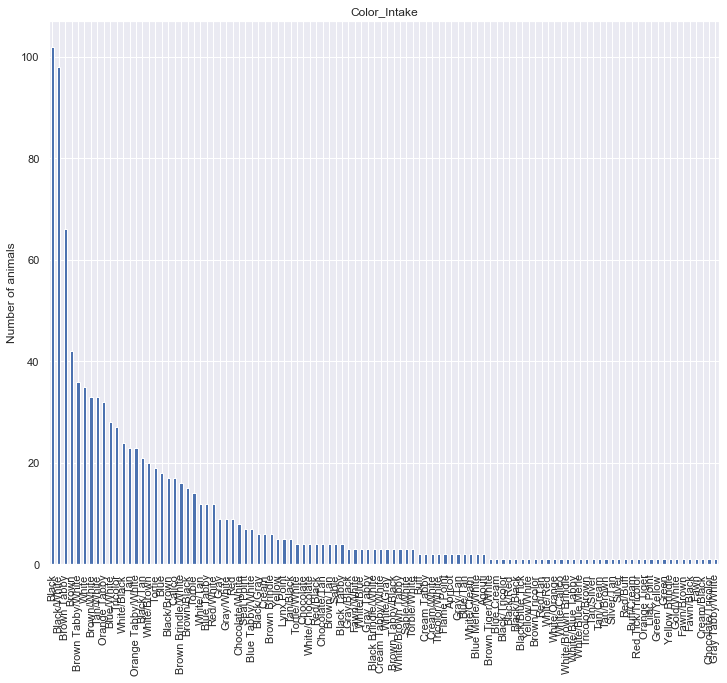

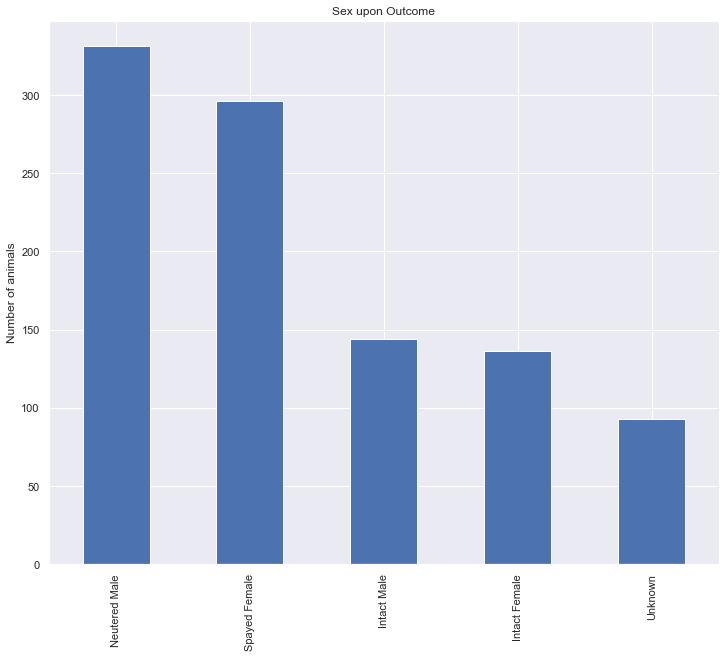

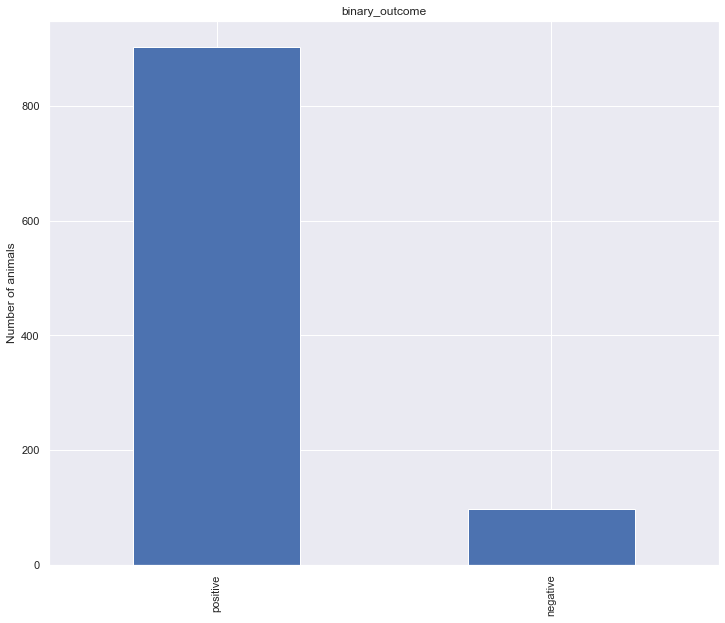

In [30]:
# Plot bar plots for all the catagorical features and save them in a single PDF file
with PdfPages('categorical_barplots_1-1.pdf') as pp:
    for col in categorical_columns:
        f = df[col].value_counts().plot(kind='bar', figsize=(12,10))
        plt.title(col)
        plt.ylabel('Number of animals')
        pp.savefig(f.get_figure())
        plt.show()

**Running Assessment:**

-  There are high **cardinalities** of some of the Categorical features. This could present problems for machine learning algorithms. 
<br>

-  There are no **missing values** and no cases of this dataset's remaining special values in the Categorical features.
<br>

# Initial Findings

### Initial findings and detailed discussion for each feature can be found in the accompanying *Data_Quality_Report_Initial_Findings.pdf* file

# (2). Data Understanding: Data Quality Plan for the cleaned CSV file.

### The initial list of issues as identified in the **Data_Quality_Report_Initial_Findings.pdf**:

- The integrity checks of the dataframe indicated irregular values in place for the continuous features. 
    - Check 1 highlighted that some registered date outcome values came before date intake of the animals. These rows were dropped 
    - Check 2 highlighted that some age intake values were negative. These rows were dropped
- Different scale: *Age upon Intake* and *Age upon Outcome* values not scalable. (years, months, weeks, days)
- Duplication of data: *MonthYear_Intake* and *Datetime_Intake*, *MonthYear_Outcome* and *Datetime_Outcome*, *Name Intake* and *Name Outcome*, *Animal Type_Intake* and *Animal Type_Outcome*, *Breed Intake* and *Breed Outcome* and *Color Intake* and *Color Outcome* were registering the duplicate values. 

- Presence of outliers - There are a significant number of outliers present across a range of different features. They initially look plausible but will need to be investigated further.

- There is high cardinality of some of the categorical data most importantly *Found Location*, *Color Outcome* and *Breed Intake* which will make these values difficult to deduce meaningful information from


### - Propose solutions to deal with the problems identified. 

1. **Integrity Checks**
    -  Drop invalid values ie values that fail the test.
2. **Differing scale** 
    -  *Age upon Intake* and *Age upon Outcome* values not scalable, measured in years/ months/ weeks/ days. One mapping needs to be picked for consistency.
3. **Duplication of data**
    -  Categorical features *MonthYear_Intake* and *Datetime_Intake*, *MonthYear_Outcome* and *Datetime_Outcome*, *Name Intake* and *Name Outcome*, *Animal Type_Intake* and *Animal Type_Outcome*, *Breed Intake* and *Breed Outcome* and *Color Intake* and *Color Outcome* require just one of each value to be recorded. Drop duplicate columns 
4. **Presence of outliers**
    -  There are a significant number of outliers present across a range of different features. They initailly look plausible but will need to be investigated further. If they don't make sense they will be removed.
5. **High Cardinality**
    -  The high cardinaltiy of some categorical values need to be investigated individually for columns *Found Location*, *Color Outcome* and *Breed Intake*. 


### - Apply solutions to obtain a new CSV file where the identified data quality issues were addressed. 

1. **Integrity Checks**

In [31]:
#drop results to test1 and test2 where test failed
df=df.drop(test_1results.index)
df=df.drop(test_2results.index)

2. **Differing scale** <br>
'Age upon Outcome' and 'Age upon Intake', now represented by 'Age Outcome' and 'Age Intake' which are measured in days
3. **Duplication of data**<br>
Categorical features 'Name_Outcome' ,'MonthYear_Intake','Animal Type_Outcome', 'MonthYear_Outcome' , 'Breed_Outcome','Color_Outcome' are deleted, removing duplicate values



4. **Presence of outliers**

In [32]:
df.sort_values(by='Age Intake', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last')[['Age Intake', 'Age Outcome']].head(5)

,Age Intake,Age Outcome
524,5479,5479
571,5478,5480
755,5400,5419
553,5198,5199
76,5113,5118


I could not deduce weather the outliers are wrong or not as the animals could be this age. Thus to be on the safe side I decided to keep them. The machine learning algorithms still need to deal with outliers in the real world as training data that is *too perfect and ideal* is just another form of bias.

5. **High Cardinality**
    -  The best solution for the high cardinality of columns *Found Location*, *Color Outcome* and *Breed Intake*. Is to plot the top 10 values of each feature 

In [33]:
foundLocation= df['Found Location'] .value_counts()[:15].index.tolist()
colorIn= df['Color_Intake'] .value_counts()[:15].index.tolist()
breedIn=df['Breed_Intake'] .value_counts()[:15].index.tolist()
print(foundLocation)
print(colorIn)
print(breedIn)

['Austin (TX)', 'Travis (TX)', 'Outside Jurisdiction', '7201 Levander Loop in Austin (TX)', 'Pflugerville (TX)', '4434 Frontier Trl in Austin (TX)', 'Manor (TX)', 'Del Valle (TX)', '902 B Sirocco Drive in Austin (TX)', '1308 Thornberry Rd in Del Valle (TX)', '1156 W Cesar Chavez in Austin (TX)', '12034 Research Blvd in Austin (TX)', '400 Grove Blvd in Austin (TX)', '1700 Burton Dr #401 in Austin (TX)', 'Cedar Park (TX)']
['Black', 'Black/White', 'Brown Tabby', 'Brown', 'Brown Tabby/White', 'White', 'Brown/White', 'Tan/White', 'Orange Tabby', 'Blue/White', 'Tricolor', 'White/Black', 'Tan', 'Orange Tabby/White', 'Black/Tan']
['Domestic Shorthair Mix', 'Pit Bull Mix', 'Chihuahua Shorthair Mix', 'Labrador Retriever Mix', 'Domestic Shorthair', 'Domestic Medium Hair Mix', 'German Shepherd Mix', 'Domestic Longhair Mix', 'Bat', 'Bat Mix', 'Siamese Mix', 'Dachshund Mix', 'Australian Cattle Dog Mix', 'German Shepherd', 'Chihuahua Shorthair']


### Summary of data quality plan:

| Variable Names                     | Data Quality Issue            | Handling Strategy              |
|------------------------------------|-------------------------------|--------------------------------|
| Animal ID                          | Scale                         | Do Nothing                     |
| Name_Intake                        | Scale, missing values         | Do Nothing                     |
| DateTime_Intake                    | Invalid cardinality           | Replace with duration, drop rows|
| MonthYear_Intake                   | Duplicate                     | Drop Feature                   |
| Found Location                     | Scale                         | Top 10 values                  |
| Intake Type                        | Undefined value               | Do nothing                    |
| Intake Condition                   | Undefined value               | Do nothing                |
| Animal Type_Intake                 | Outliers                      | Do Nothing                     |
| Sex upon Intake                    | Scale                         | Do Nothing                     |
| Age upon Intake                    | Invalid cardinality           | Replace with age intake in days, drop rows|
| Breed_Intake                       | Scale                         | Do Nothing   |
| Color_Intake                       | Scale                         | Do Nothing  |
| Name_Outcome                       | Duplicate                     | Drop Feature                   |
| DateTime_Outcome                   | Invalid cardinality           | Replace with duration, drop rows|
| MonthYear_Outcome                  | Duplicate                     | Drop Feature                   |
| Date of Birth                      | Outliers                      | Do Nothing                     |
| Animal Type_Outcome                | Duplicate                     | Drop Feature                   |
| Sex upon Outcome	                 | Scale                         | Do nothing                     |
| Age upon Outcome                   | Invalid cardinality           | Replace with age outcome in days, drop rows|
| Breed_Outcome                      | Duplicate                     | Drop Feature                   |
| Color_Outcome                      | Duplicate                     | Drop Feature                   |
| binary_outcome                     | Invalid cardinality           | convert to categorical type    |


### - Save the new CSV file with a self explanatory name. Save the data quality plan to a single PDF file (as a table or a structured text).


Data quality plan saved as a picture and available in Data_Quality_Plan.pdf.

In [34]:
# Print table with continuous statistics
continuous_columns = df.select_dtypes(['int64']).columns
df[continuous_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
Age Outcome,988.0,746.143725,1058.332983,0.0,85.0,366.0,787.0,5480.0
Age Intake,988.0,728.310729,1056.589391,0.0,61.0,365.0,731.0,5479.0


In [35]:
# Print table with categorical statistics
df.select_dtypes(['category']).describe().T

,count,unique,top,freq
Animal ID,988,988,A812886,1
Name_Intake,630,546,Bella,7
Found Location,988,777,Austin (TX),153
Intake Type,988,5,Stray,729
Intake Condition,988,7,Normal,855
Animal Type_Intake,988,4,Dog,503
Sex upon Intake,988,5,Intact Male,349
Breed_Intake,988,210,Domestic Shorthair Mix,297
Color_Intake,988,103,Black,101
Sex upon Outcome,988,5,Neutered Male,325


In [36]:
# Drop unneeded rows and columns
df = df.drop(['DateTime_Intake','DateTime_Outcome' ,'Date of Birth','Name_Intake'], 1)

In [37]:
# Write the cleaned dataframe to a csv file
df.to_csv('cleandf.csv', index=False)

In [38]:
df.dtypes

Animal ID             category
Found Location        category
Intake Type           category
Intake Condition      category
Animal Type_Intake    category
Sex upon Intake       category
Breed_Intake          category
Color_Intake          category
Sex upon Outcome      category
binary_outcome        category
Age Outcome              int64
Age Intake               int64
dtype: object

# (3). Exploring relationships between feature pairs:

### - Choose a subset of features you find promising and plot pairwise feature interactions (e.g., continuous-continuous feature plot or continuous-categorical plots or correlation plots). Explain your choices.

The features that I will look at for pairwise feature interaction are the following continuous features:
- Age Outcome: 
- Age Intake:


and the following categorical features:
- Found Location
- Intake Type
- Intake Condition
- Animal_Type Intake
- Breed Intake
- binary_outcome


The choices here I based on the idea that these particular features would be strong markers to indicate binary outcome of the animal as also discussed based on plots in the Data_Quality_report.pdf.

### Correlations for the numeric features

(array([0.5, 1.5]), <a list of 2 Text xticklabel objects>)

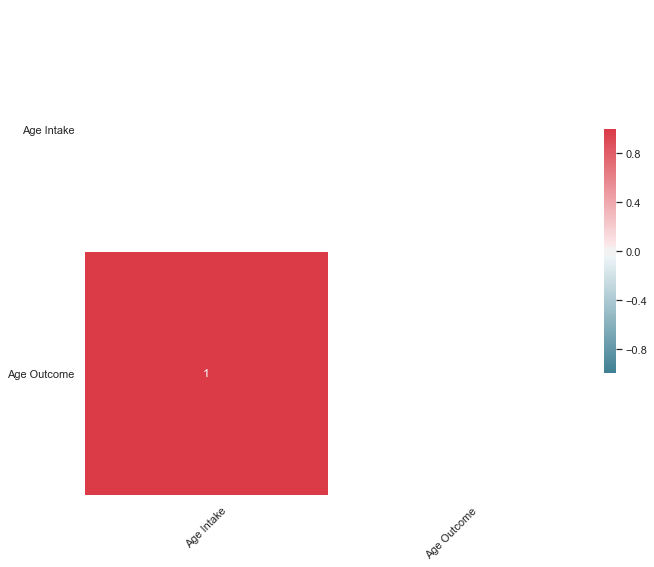

In [39]:
# Correlation matrix using code found on https://stanford.edu/~mwaskom/software/seaborn/examples/many_pairwise_correlations.html
sns.set(style="white")
continuous_columns1 = [
                      'Age Intake',
                        'Age Outcome',
                      ]
# Calculate correlation of all pairs of continuous features
corr = df[continuous_columns1].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom colormap - blue and red
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=1, vmin=-1,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.yticks(rotation = 0)
plt.xticks(rotation = 45)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


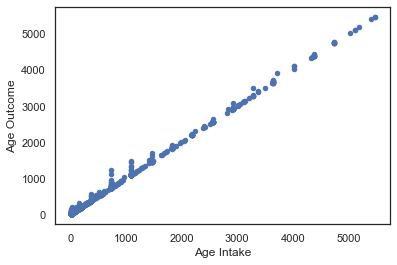

In [40]:
df.plot(kind='scatter', x='Age Intake', y='Age Outcome')


### Categorical vs Categorical feature plots

/Users/eveconnollymac/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:628: FutureWarning: Categorical.ravel will return a Categorical object instead of an ndarray in a future version.
  return self._values.ravel(order=order)


Animal Type Intake
Index 	 Count
Other 	 55
Cat 	 423
Dog 	 503
Bird 	 7


(0, 100)

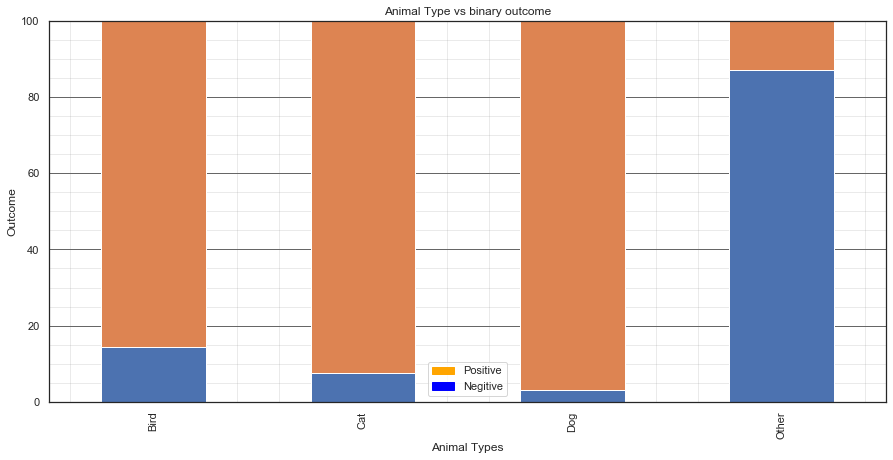

In [41]:
#Using code from the module lab
animalType = pd.unique(df["Animal Type_Intake"].ravel())

# add new column and set values to zero
df['percent'] = 0

#print header
print("Animal Type Intake")
print("Index \t Count")

# for each delinquency category
for i in animalType:
    
    count = df[df["Animal Type_Intake"] == i].count()['binary_outcome']
    count_percentage = (1 / count) * 100
        
    # print out index vs count
    print(i, "\t", count)
    
    index_list = df[df['Animal Type_Intake'] == i].index.tolist()
    for ind in index_list:
        df.loc[ind, 'percent'] = count_percentage
        
group = df[['percent','Animal Type_Intake','binary_outcome']].groupby(['Animal Type_Intake','binary_outcome']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="Animal Type vs binary outcome", figsize=(15,7), grid=True)

# add legend
red_patch = mpatches.Patch(color='orange', label='Positive')
blue_patch = mpatches.Patch(color='blue', label='Negitive')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

# add gridlines
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

my_plot.set_xlabel("Animal Types")
my_plot.set_ylabel("Outcome")
my_plot.set_ylim([0,100])

Intake Condition
Index 	 Count
Injured 	 50
Normal 	 855
Sick 	 49
Nursing 	 30
Aged 	 2
Other 	 1
Behavior 	 1


(0, 100)

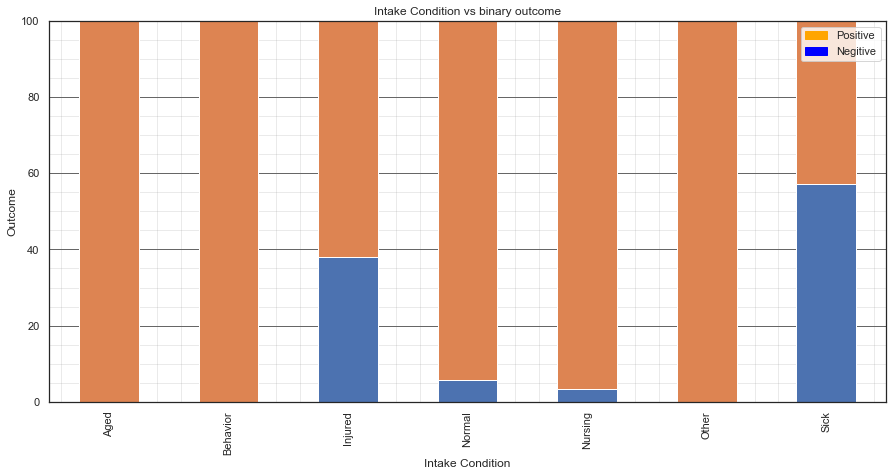

In [42]:
#Using code from the module lab
animalcond = pd.unique(df["Intake Condition"].ravel())

# add new column and set values to zero
df['percent'] = 0

#print header
print("Intake Condition")
print("Index \t Count")

# for each delinquency category
for i in animalcond:
    
    count = df[df["Intake Condition"] == i].count()['binary_outcome']
    count_percentage = (1 / count) * 100
        
    # print out index vs count
    print(i, "\t", count)
    
    index_list = df[df['Intake Condition'] == i].index.tolist()
    for ind in index_list:
        df.loc[ind, 'percent'] = count_percentage
        
group = df[['percent','Intake Condition','binary_outcome']].groupby(['Intake Condition','binary_outcome']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="Intake Condition vs binary outcome", figsize=(15,7), grid=True)

# add legend
red_patch = mpatches.Patch(color='orange', label='Positive')
blue_patch = mpatches.Patch(color='blue', label='Negitive')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

# add gridlines
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

my_plot.set_xlabel("Intake Condition")
my_plot.set_ylabel("Outcome")
my_plot.set_ylim([0,100])

Intake Type
Index 	 Count
Wildlife 	 44
Stray 	 729
Owner Surrender 	 157
Euthanasia Request 	 2
Public Assist 	 56


(0, 100)

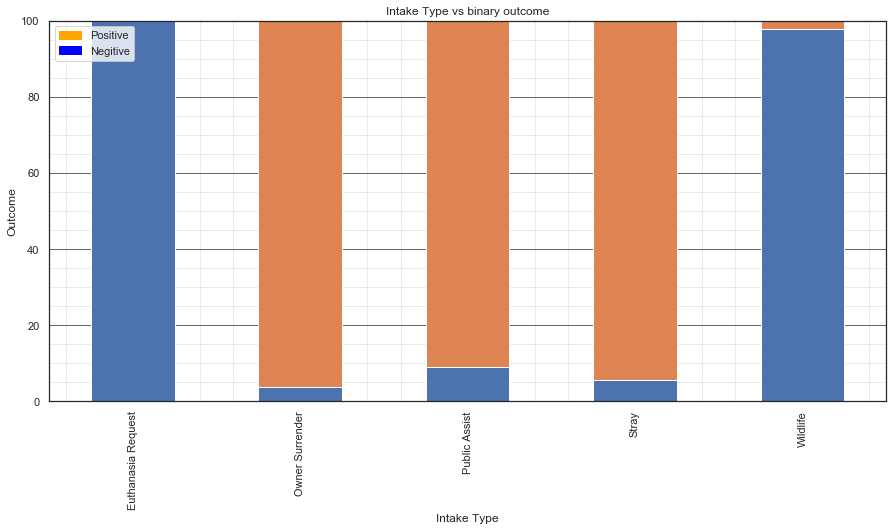

In [43]:
#Using code from the module lab
intype = pd.unique(df["Intake Type"].ravel())

# add new column and set values to zero
df['percent'] = 0

#print header
print("Intake Type")
print("Index \t Count")

# for each delinquency category
for i in intype:
    
    count = df[df["Intake Type"] == i].count()['binary_outcome']
    count_percentage = (1 / count) * 100
        
    # print out index vs count
    print(i, "\t", count)
    
    index_list = df[df['Intake Type'] == i].index.tolist()
    for ind in index_list:
        df.loc[ind, 'percent'] = count_percentage
        
group = df[['percent','Intake Type','binary_outcome']].groupby(['Intake Type','binary_outcome']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="Intake Type vs binary outcome", figsize=(15,7), grid=True)

# add legend
red_patch = mpatches.Patch(color='orange', label='Positive')
blue_patch = mpatches.Patch(color='blue', label='Negitive')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

# add gridlines
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

my_plot.set_xlabel("Intake Type")
my_plot.set_ylabel("Outcome")
my_plot.set_ylim([0,100])

### Continuous-categorical feature plots

<Figure size 432x288 with 0 Axes>

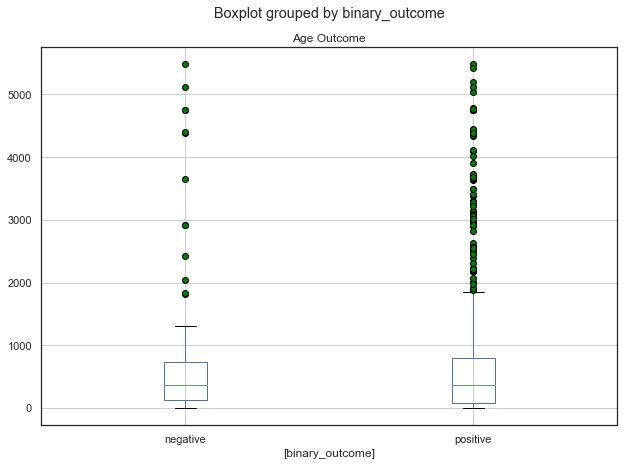

In [44]:
plt.figure()
flierprops = dict(marker='o', markerfacecolor='green', markersize=6,
                  linestyle='none')
df.boxplot(column=['Age Outcome'], by=['binary_outcome'], flierprops=flierprops, figsize=(10,7))

<Figure size 432x288 with 0 Axes>

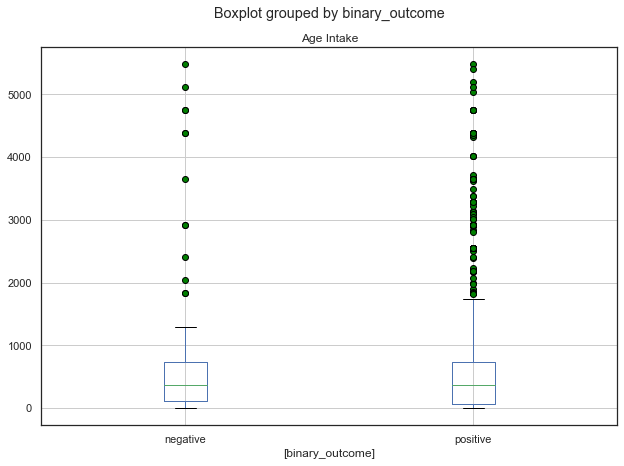

In [45]:
plt.figure()
flierprops = dict(marker='o', markerfacecolor='green', markersize=6,
                  linestyle='none')
df.boxplot(column=['Age Intake'], by=['binary_outcome'], flierprops=flierprops, figsize=(10,7))

<Figure size 432x288 with 0 Axes>

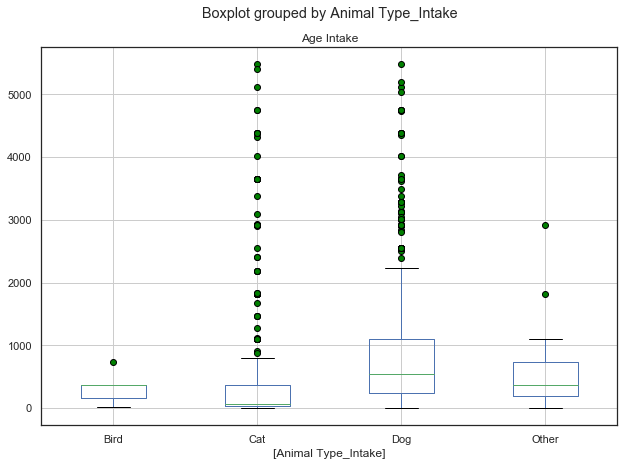

In [46]:
plt.figure()
flierprops = dict(marker='o', markerfacecolor='green', markersize=6,
                  linestyle='none')
df.boxplot(column=['Age Intake'], by=['Animal Type_Intake'], flierprops=flierprops, figsize=(10,7))

<Figure size 432x288 with 0 Axes>

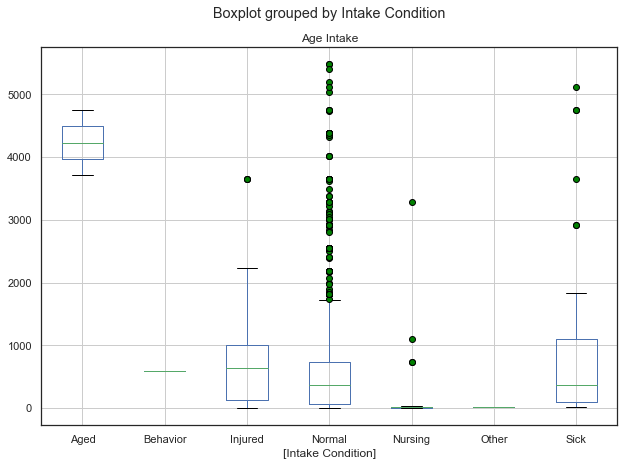

In [47]:
plt.figure()
flierprops = dict(marker='o', markerfacecolor='green', markersize=6,
                  linestyle='none')
df.boxplot(column=['Age Intake'], by=['Intake Condition'], flierprops=flierprops, figsize=(10,7))

**Continuous-continuous:** As there is very limited continuous data provided in the dataset, plotting the age outcome against age intake tells us that the age outcome is always marginally greater than the age intake. This means that animals stay in the shelter for the most part for a very breif period of time. <br>
**Categorical-categorical:** <br><u>Animal type vs binary outcome:</u> the most prevelent negative outcomes of animal type is other, which is predominantly made up of wildlife. Domestic pets ie cats, dogs and birds have a mostly positive outcome <br>
<u> Intake condition vs binary outcome:</u>  The animals brought in injured or sick are the most likely to have a negative outcome in the shelter. Very few animals nursing or normal when they are brought in have negative outcomes.<br>
<u> Intake type vs binary outcome:</u>  Wildlife and euthanasia request animals are most likely to have negative ooutcome. Animlas brought by owner surrender, public assist and stay are likely more likely ot have positive outcome.<br>
**Categorical-continuous:**
The boxplots grouped by binary outcome for Age Intake and Age Outcome are similar showing outlier values above 200 with the majority of values less than 1000. These graphs also show the greater percentage of positive outcomes to negative.<br> 
The boxplot grouped by intake condition for the age intake shows that the older animals are taken to the shelter due to old age, while injured and normal animlas are younger. Sick animals are marginally older, showing animals are more likely to be sick when they are old

# (4). Transform, extend or combine the existing features to create a few new features (at least 3)

### Aim to better capture the problem domain and the target outcome. Justify the steps and choices you are making. Add these features to your clean dataset and save it as a CSV file with a self explanatory name. 

#### **New feature 1** 
- Duration of stay : The amount of days the animals stay in the shelter 


In [49]:
duration=df['Age Outcome']-df["Age Intake"]
df['Duration of Stay (in days)']=pd.Series(duration, dtype='int64')
df['Duration of Stay (in days)'].astype('timedelta64[D]')

0       0 days
1       6 days
2      21 days
3      41 days
4       5 days
5       5 days
6      13 days
7       1 days
8       9 days
9       0 days
10      0 days
11     25 days
12      9 days
13     25 days
14      2 days
15      0 days
16      1 days
17     87 days
18     61 days
19      7 days
20     10 days
21      0 days
22     67 days
23      5 days
24     70 days
25      4 days
26      0 days
27     64 days
28      0 days
29      4 days
30      0 days
31      0 days
32      0 days
33     67 days
34      4 days
35      5 days
36      7 days
37      0 days
38      9 days
39     22 days
40      4 days
41      8 days
42     11 days
43      5 days
44      0 days
45      5 days
46     11 days
47      0 days
48      1 days
49     18 days
50     14 days
51      6 days
52      2 days
53      0 days
54     21 days
55      1 days
56      0 days
57     22 days
58     25 days
59      1 days
60     36 days
61      1 days
62      2 days
63      0 days
64     14 days
65    151 days
66      7 

In [50]:
#top 10 most frequent durations of stay
df['Duration of Stay (in days)'].value_counts()[:10].index.tolist()

[0, 1, 4, 5, 2, 7, 6, 3, 11, 8]

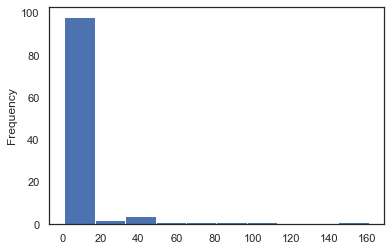

In [51]:
df['Duration of Stay (in days)'].value_counts().plot(kind='hist', bins=10)

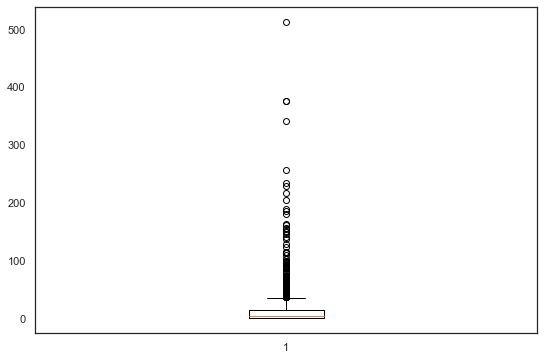

In [52]:
duration=df['Duration of Stay (in days)']

max_a = np.max(duration)
p_75 = np.percentile(duration, 75)
p_25 = np.percentile(duration, 25)
min_a = np.min(duration)
iqr = p_75 - p_25
lower = np.max([min_a, p_25 - 1.5 * iqr])
upper = np.min([max_a, p_75 + 1.5 * iqr])
# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(duration)

<Figure size 432x288 with 0 Axes>

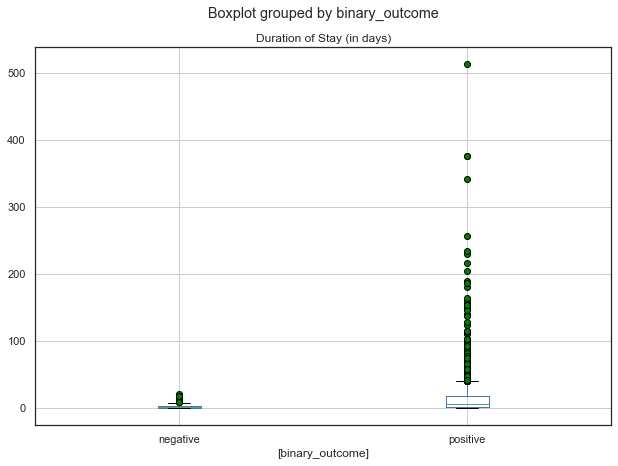

In [53]:
#compare binary outcome to duration of stay
plt.figure()
flierprops = dict(marker='o', markerfacecolor='green', markersize=6,
                  linestyle='none')
df.boxplot(column=['Duration of Stay (in days)'], by=['binary_outcome'], flierprops=flierprops, figsize=(10,7))

<Figure size 432x288 with 0 Axes>

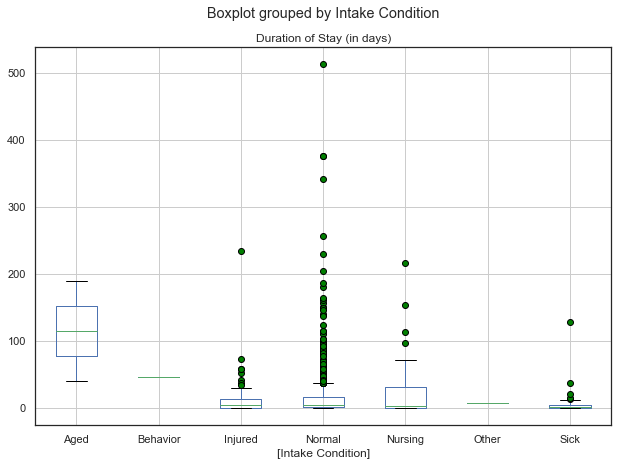

In [54]:
plt.figure()
flierprops = dict(marker='o', markerfacecolor='green', markersize=6,
                  linestyle='none')
df.boxplot(column=['Duration of Stay (in days)'], by=['Intake Condition'], flierprops=flierprops, figsize=(10,7))

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


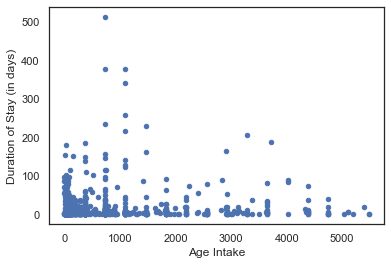

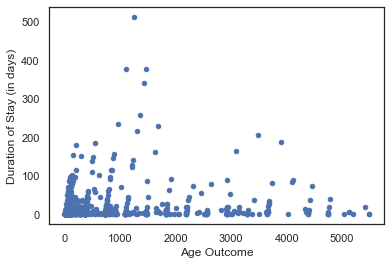

In [55]:
df.plot(kind='scatter', x='Age Intake', y='Duration of Stay (in days)')
df.plot(kind='scatter', x='Age Outcome', y='Duration of Stay (in days)')

In [56]:
df['Duration of Stay (in days)'].describe().T

count    988.000000
mean      17.832996
std       39.362568
min        0.000000
25%        1.000000
50%        5.000000
75%       15.000000
max      513.000000
Name: Duration of Stay (in days), dtype: float64

The main reason for the date values in the original dataframe is to understand how long the animals are staying in the shelter for. In order to decrease the length of time animals spend in the shelter we must identify the average and aim to decrease this. The intake condition comared to duration of stay shows that nursing and older animals stay longer than very sick/injured or normal animals.<br>
The duration of stay in the shelter is very short, with the vast majority of animals staying 0-1 day, the top 10 values are all less than 10 (0, 1, 4, 5, 2, 7, 6, 3, 11, 8). The outlier (max value) means the mean is squewed left.

#### **New feature 2** 
- Month in: The month the animal is marked in to the shelter

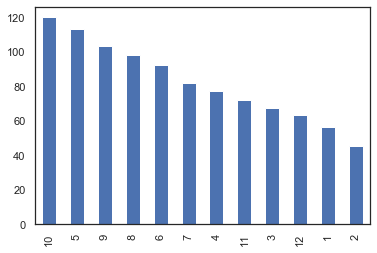

In [57]:
#most intake of animals occurs in October
df['monthIntake'] = dateIn.dt.month
df['monthIntake'].value_counts().plot(kind='bar')


The other relevant use of the date values is to represent the most common month that animals are brought to the shelter. The most common month is October, when there are fireworks around halloween, and the night falls early. Many domestic pets run away in fear of the fireworks and because of the dark nights there is more road kill of wildlife

#### **New feature 3** 
- Month out : The month the animal is marked out from the shelter

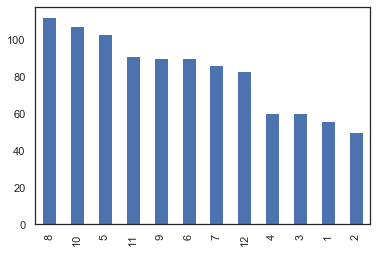

In [58]:
#most outcome of animals occurs in August
df['monthOutcome'] = dateOut.dt.month
df['monthOutcome'].value_counts().plot(kind='bar')


The other relevant use of the date values is to represent the most common month that animals are taken/leave the shelter. This month is August. As the summer ends people are sad to go back to work and find that adopting a pet is a pick me up to "September blues". The second most common month is October. This is expected as most animal's duration of stay is one day or less. So we can see

### To finish - Print data types, descriptive tables, save to csv

In [59]:
df.dtypes

Animal ID                     category
Found Location                category
Intake Type                   category
Intake Condition              category
Animal Type_Intake            category
Sex upon Intake               category
Breed_Intake                  category
Color_Intake                  category
Sex upon Outcome              category
binary_outcome                category
Age Outcome                      int64
Age Intake                       int64
percent                        float64
Duration of Stay (in days)       int64
monthIntake                      int64
monthOutcome                     int64
dtype: object

In [60]:
# Print table with continuous statistics
continuous_columns = df.select_dtypes(['int64','float64']).columns
df[continuous_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
Age Outcome,988.0,746.143725,1058.332983,0.000000,85.000000,366.000000,787.000000,5480.0
Age Intake,988.0,728.310729,1056.589391,0.000000,61.000000,365.000000,731.000000,5479.0
percent,988.0,0.506073,2.301979,0.137174,0.137174,0.137174,0.636943,50.0
Duration of Stay (in days),988.0,17.832996,39.362568,0.000000,1.000000,5.000000,15.000000,513.0
monthIntake,988.0,6.887652,3.143725,1.000000,5.000000,7.000000,10.000000,12.0
monthOutcome,988.0,7.091093,3.218771,1.000000,5.000000,7.000000,10.000000,12.0


In [61]:
# Print table with categorical statistics
df.select_dtypes(['category']).describe().T

,count,unique,top,freq
Animal ID,988,988,A812886,1
Found Location,988,777,Austin (TX),153
Intake Type,988,5,Stray,729
Intake Condition,988,7,Normal,855
Animal Type_Intake,988,4,Dog,503
Sex upon Intake,988,5,Intact Male,349
Breed_Intake,988,210,Domestic Shorthair Mix,297
Color_Intake,988,103,Black,101
Sex upon Outcome,988,5,Neutered Male,325
binary_outcome,988,2,positive,892


In [62]:
# Write the cleaned dataframe to a csv file
df.to_csv('animalShelter_cleaned_new_features.csv', index=False)